<a href="https://colab.research.google.com/github/joonheeCho/Artificial-Intelligence-Basic-Course/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B8%B0%EC%B4%88%EA%B3%BC%EC%A0%95_Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<파이토치 실습>**
1. Tensor

1) Tensor 생성 및 초기화

In [2]:
import torch
import numpy as np

In [4]:
# 초기화되지 않은 행렬 생성
x = torch.empty(5,3)
print(x)

tensor([[-3.7054e-25,  3.0780e-41,  3.3631e-44],
        [ 0.0000e+00,         nan, -1.5333e+00],
        [ 4.4721e+21,  1.5956e+25,  4.7399e+16],
        [ 3.7293e-08,  5.0063e-01, -1.0018e+00],
        [-4.1815e-01,  1.7413e+00,  1.5417e-01]])


In [5]:
# 0 ~ 1 사이의 랜덤 초기화 행렬 생성
x = torch.rand(5,3)
print(x)

tensor([[0.5803, 0.8232, 0.2337],
        [0.9722, 0.3622, 0.0040],
        [0.1248, 0.6467, 0.8986],
        [0.8430, 0.4466, 0.9889],
        [0.0181, 0.7303, 0.5180]])


In [6]:
x.mean()

tensor(0.5460)

In [7]:
x.std()

tensor(0.3385)

In [8]:
# Standard Normal Distribution에서 랜덤 초기화 행렬 생성
x = torch.randn(5,3)
print(x)

tensor([[ 0.7508,  0.1216,  0.7256],
        [-0.1478,  2.5342,  0.3063],
        [ 0.2571, -0.6726, -0.8647],
        [-1.6729, -0.4700, -0.7267],
        [ 0.4902,  0.2752, -0.5691]])


In [9]:
x.mean()

tensor(0.0225)

In [10]:
x.std()

tensor(0.9669)

In [11]:
# 특정 값을 tensor로 만들기
x = torch.tensor([[1.2, 4.5],[1, 2]])
x

tensor([[1.2000, 4.5000],
        [1.0000, 2.0000]])

2) Tensor size & numpy 변환

In [12]:
# Size 확인
x = torch.randn(3,4)
print(x)
print("x size : ", x.size())

tensor([[ 1.0807, -0.0862, -0.4194,  0.8130],
        [-1.4328,  0.2570,  0.5388, -0.1320],
        [-0.1072,  0.6620,  0.7361, -0.1225]])
x size :  torch.Size([3, 4])


In [13]:
# Resize - "reshape" : any tensor
x = torch.rand(3,4)
y = x.reshape(4,3)
z = x.reshape(-1, 2)
print(x, x.size(), "\n", y, y.size(), "\n", z, z.size())

tensor([[0.1260, 0.5738, 0.9339, 0.0503],
        [0.4808, 0.6221, 0.5229, 0.4494],
        [0.7388, 0.8834, 0.7648, 0.2077]]) torch.Size([3, 4]) 
 tensor([[0.1260, 0.5738, 0.9339],
        [0.0503, 0.4808, 0.6221],
        [0.5229, 0.4494, 0.7388],
        [0.8834, 0.7648, 0.2077]]) torch.Size([4, 3]) 
 tensor([[0.1260, 0.5738],
        [0.9339, 0.0503],
        [0.4808, 0.6221],
        [0.5229, 0.4494],
        [0.7388, 0.8834],
        [0.7648, 0.2077]]) torch.Size([6, 2])


In [14]:
# Tensor to numpy
x = torch.ones(5)
y = x.numpy()
print(x, type(x))
print(y, type(y))

tensor([1., 1., 1., 1., 1.]) <class 'torch.Tensor'>
[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>


In [15]:
# Numpy to tensor
x = np.ones(5)
y = torch.from_numpy(x)
print(x, type(x))
print(y, type(y))

[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>
tensor([1., 1., 1., 1., 1.], dtype=torch.float64) <class 'torch.Tensor'>


3) GPU 연산을 위한 CUDA tensor

In [3]:
x = torch.ones(5)
y = x.to(device="cuda:0") #런타임 연결 gpu로 설정
print(x)
print(y)

tensor([1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1.], device='cuda:0')


4) Tensor Autograd

In [4]:
x = torch.tensor(([1., 2.], [3., 4.]), requires_grad=True)
print(x)
y = (x+2) **2 *3
print(y)

out = y.mean()
print(out)

out.backward()
print(x.grad)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[ 27.,  48.],
        [ 75., 108.]], grad_fn=<MulBackward0>)
tensor(64.5000, grad_fn=<MeanBackward0>)
tensor([[4.5000, 6.0000],
        [7.5000, 9.0000]])


**< RNN MNIST classifier>**

1. define hyper-parameters

In [5]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
sequence_length = 28
input_size = 28     # input data의 차원
hidden_size = 128   # hidden state의 차원
num_layers = 10     # RNN의 은닉층 레이어 개수
num_classes = 10
batch_size = 50
num_epochs = 3
learning_rate = 0.001

2. load data

In [6]:
import torchvision #using torchvision, we can eaily download MNIST dataset
import torchvision.transforms as transforms #to transform MNIST "images" to "tensor"

In [7]:
train_data = torchvision.datasets.MNIST(root='./datasets',
                                        train=True,
                                        transform=transforms.ToTensor(),
                                        download=True)

test_data = torchvision.datasets.MNIST(root='./dataset',
                                       train=False,
                                       transform=transforms.ToTensor(),
                                       download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



In [8]:
import matplotlib.pyplot as plt

In [9]:
print(test_data[0][0].shape)
print(test_data[0][1])

torch.Size([1, 28, 28])
7


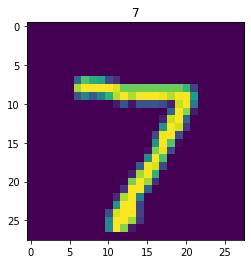

In [10]:
plt.imshow(test_data[0][0].reshape(28,28))
plt.title(test_data[0][1])
plt.show()

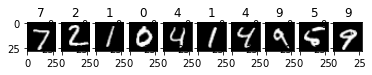

In [11]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(test_data[i][0].reshape(28,28), cmap='gray')
  plt.title(test_data[i][-1])

3. define data loader

In [12]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=False)   

In [13]:
# cf) Check dataloader shape
image, label = next(iter(test_loader))
print(image.size()) # [Batch, Channel, Height, Width]

torch.Size([50, 1, 28, 28])


4. define model

In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class RNN(nn.Module):
  def __init__(self, intput_size, hidden_size, num_layers, num_classes):
    super(RNN, self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    # set initial hidden states and cell states
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # torch.size([10, 50, 128])
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # torch.size([10, 50, 128])

    #Forward propagate LSTM
    out, _  = self.lstm(x, (h0, c0)) # output: tensor [batch_size, seq_length, hidden_size]
    # lstm의 출력 형식: (hidden state, cell state)

    #Decode the hidden state of the last time step
    out = self.fc(out[:,-1,:])

    return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)

5. set loss & optimizer

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

6. train & test

In [17]:
####### Train #######
total_step = len(train_loader)
for epoch in range(num_epochs):
  for i, (image, label) in enumerate(train_loader):
    image = image.reshape(-1, sequence_length, input_size).to(device)
    label = label.to(device)

    # Forward
    output = model(image)
    loss = criterion(output, label)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 400 == 0:
      print("Epoch [{}/{}], Step[{}/{}], Loss:{:.4f}".format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/3], Step[400/1200], Loss:0.9449
Epoch [1/3], Step[800/1200], Loss:0.3095
Epoch [1/3], Step[1200/1200], Loss:0.4773
Epoch [2/3], Step[400/1200], Loss:0.4289
Epoch [2/3], Step[800/1200], Loss:0.1170
Epoch [2/3], Step[1200/1200], Loss:0.1282
Epoch [3/3], Step[400/1200], Loss:0.2694
Epoch [3/3], Step[800/1200], Loss:0.0952
Epoch [3/3], Step[1200/1200], Loss:0.0295


In [18]:
######## TEST ########
with torch.no_grad():
  correct = 0

  for image, label in test_loader:
    image = image.reshape(-1, sequence_length, input_size).to(device)
    label = label.to(device)
    output = model(image)
    _, pred = torch.max(output.data, 1)
    correct += (pred == label).sum().item()

  print('Test Accuracy of RNN model on the {} test images: {}%'.format(len(test_data), 100 * correct / len(test_data)))

Test Accuracy of RNN model on the 10000 test images: 97.29%


**< RNN IMDB Classifier>**

Define Hyper-parameters and Device Configuration

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchsummary
import torchtext
from torchtext import data, datasets

In [20]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
batch_size = 64
learning_rate = 0.005
num_epochs = 5

out_node = 1 ## binary {neg, pos}
num_layers = 3
embedd_dim = 128  # 단어를 얼만큼의 차원으로 임베딩할 것인가
hidden_dim = 256  
valid_percent = 0.2  # train data를 train data, validation data 로 분리할 때의 비율 
MIN_FREQ = 10

2. Download IMDB

In [21]:
TEXT = torchtext.legacy.data.Field(sequential=True, batch_first=True, lower=True)
# TEXT = data.Field(tokenize='spacy')
LABEL = torchtext.legacy.data.LabelField(sequential=False, dtype=torch.float, batch_first=True)

train_data, test_data = torchtext.legacy.datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


100%|██████████| 84.1M/84.1M [00:02<00:00, 30.1MB/s]


In [22]:
# cf) check data
print("train:", len(train_data), "test: ",len(test_data))
print(vars(train_data.examples[0]))

train: 25000 test:  25000
{'text': ['this', 'film', 'reminds', 'me', 'of', '42nd', 'street', 'starring', 'bebe', 'daniels', 'and', 'ruby', 'keeler.', 'when', 'i', 'watch', 'this', 'film', 'a', 'lot', 'of', 'it', 'reminded', 'me', 'of', '42nd', 'street,', 'especially', 'the', 'character', 'eloise', "who's", 'a', 'temperamental', 'star', 'and', 'she', 'ends', 'up', 'falling', 'and', 'breaks', 'her', 'ankle,', 'like', 'bebe', 'daniels', 'did', 'in', '42nd', 'street', 'and', 'another', 'performer', 'gets', 'the', 'part', 'and', 'become', 'a', 'star.', 'this', 'film,', 'like', 'most', 'race', 'films,', 'keeps', 'people', 'watching', 'because', 'of', 'the', 'great', 'entertainment.', 'race', 'films', 'always', 'showed', 'black', 'entertainment', 'as', 'it', 'truly', 'was', 'that', 'was', 'popular', 'in', 'that', 'time', 'era.', 'the', 'dancing', 'styles,', 'the', 'music,', 'dressing', 'styles,', "you'll", 'love', 'it.', 'this', 'movie', 'could', 'of', 'been', 'big', 'if', 'it', 'was', 'made'

3. Make Validation Dataset

In [23]:
train_data, valid_data = train_data.split(split_ratio=1-valid_percent)

In [24]:
# cf) check each data
print("train: ", len(train_data))
print("valid: ", len(valid_data))
print("test : ", len(test_data))

train:  20000
valid:  5000
test :  25000


4. 단어 집합 생성

In [25]:
TEXT.build_vocab(train_data, min_freq=MIN_FREQ) # N번 이상 나온 단어들에 대하여 vocab set 생성
LABEL.build_vocab(train_data)

In [26]:
# cf) check Vocab Set
vocab_size = len(TEXT.vocab)
print("단어 집합의 크기: ", vocab_size)   # 해당 갯수의 단어를 가지고 분석을 진행

단어 집합의 크기:  23266


5. define dataloader

In [27]:
train_loader = torchtext.legacy.data.BucketIterator(dataset=train_data,
                                  batch_size=batch_size,
                                  device=device)

valid_loader = torchtext.legacy.data.BucketIterator(dataset=valid_data,
                                  batch_size=batch_size,
                                  device=device)

test_loader = torchtext.legacy.data.BucketIterator(dataset=test_data,
                                  batch_size=batch_size,
                                  train=False,
                                  device=device)

6. define model

In [28]:
class Sentiment(nn.Module):
  def __init__(self, num_vocab, embedding_dim, hidden_dim, num_layers, out_node, drop_percent=0.2):
    super(Sentiment, self).__init__()

    self.num_vocab = num_vocab
    
    self.embed = nn.Embedding(num_embeddings=num_vocab, embedding_dim=embedd_dim)
    # 앞서 구성한 단어 set에 대해서, 임베딩 차원에 맞춰서 임베딩을 진행
    self.gru = nn.GRU(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
    self.dropout = nn.Dropout(drop_percent)

    self.fc = nn.Linear(hidden_dim, out_node)    

  def forward(self, x):
    x = self.embed(x)
    out, hidden = self.gru(x)
    out = self.dropout(out)
    out = self.fc(out[:,-1,:])
    return out

In [29]:
model = Sentiment(vocab_size, embedd_dim, hidden_dim, num_layers, out_node).to(device)

7. set loss & optimizer

In [30]:
criterion = nn.BCEWithLogitsLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

8. Train & Test

# train function

In [31]:
def train(model, train_loader, optimizer, criterion):
  epoch_loss, acc = 0, 0
  model.train()

  for i, data in enumerate(train_loader):
    text = data.text
    label = data.label

    out = model(text).squeeze(1)    # out의 크기가 [batch size, 1]이므로 squeeze해서 [batch size]로 size를 변경해줘야 함 
    loss = criterion(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    acc += (torch.round(torch.sigmoid(out))==label).sum()
    # 모델의 예측 값과 라벨이 같으면 accuracy를 증가
    epoch_loss += loss.item()
    

  return epoch_loss/(i+1), acc / len(train_loader.dataset) * 100

# evalutaion function

In [32]:
def evaluate(model, data_loader, criterion):
  epoch_loss, acc = 0, 0
  model.eval()

  with torch.no_grad():
    for data in data_loader:
      text = data.text
      label = data.label

      out = model(text).squeeze(1)
      loss = criterion(out, label)

      acc += (torch.round(torch.sigmoid(out))==label).sum()
      epoch_loss += loss.item()

  return epoch_loss/len(data_loader), acc / len(data_loader.dataset) * 100

In [33]:
# GRU #
# Train
print("____GRU____")
best_valid_loss = float('inf')
best_epoch = 0
for epoch in range(num_epochs):
  train_loss, train_acc = train(model, train_loader, optimizer, criterion)
  valid_loss, valid_acc = evaluate(model, valid_loader, criterion)


  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    best_epoch = epoch
    torch.save(model.state_dict(), "GRU_epoch_{}.pth".format(epoch))

  print("Epoch[{}/{}], Train Loss:{:.4f}, Train Acc:{:.2f}, Valid Loss:{:.4f}, Valid Acc:{:.2f}".format(epoch+1, num_epochs, train_loss, train_acc, valid_loss, valid_acc))

# Test
model.load_state_dict(torch.load('./GRU_epoch_{}.pth'.format(best_epoch)))
GRU_loss, GRU_acc = evaluate(model, test_loader, criterion)
print("\nGRU's IMDB Accuracy:{:.2f}% (Loss:{:.4f})".format(GRU_acc, GRU_loss))

____GRU____
Epoch[1/5], Train Loss:0.6919, Train Acc:55.28, Valid Loss:0.5933, Valid Acc:67.56
Epoch[2/5], Train Loss:0.4139, Train Acc:81.17, Valid Loss:0.3626, Valid Acc:84.02
Epoch[3/5], Train Loss:0.2609, Train Acc:89.45, Valid Loss:0.3346, Valid Acc:85.30
Epoch[4/5], Train Loss:0.2112, Train Acc:91.53, Valid Loss:0.4106, Valid Acc:83.04
Epoch[5/5], Train Loss:0.3297, Train Acc:85.85, Valid Loss:0.4266, Valid Acc:81.62

GRU's IMDB Accuracy:85.97% (Loss:0.3367)
